Libraries


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [93]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Robotech Project/Copy of Egypt_Houses_Price.csv')

To Do list

In [94]:
#Machine Learning Project:
#  Clear and concise preprocessing steps:
#	-  Handle nulls/missing data if any exist  >>>>>> done
#	-  Handle new data found from user input e.g: Countries during train: (Egypt, Palestine,Syria). Countries during test: (South Africa, Ireland, Spain)
#	-  Handle missing data from user input >>>>> done
#	-  Split data into train, validation and test data. >> done
#	-  Use K-Fold Cross-Validation. >> done
#	-  Exploratory Data Analysis:
#		-  Use graphs and plots to explore your data and show relationships between variables >> done
#		-  Show if there are any outliers in your data and handle according to the accuracy. >> done

#  Regression models:
#	-  Use at least 4 models. >> done
#	-  Use a hyperparameter optimizer (E.G: Grid Search) for at least 1 model.
#	-  Compare errors and accuracy of each model. >> done

Analsisys

In [95]:
df.shape

(27361, 12)

In [96]:
df.info()
#there is nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [97]:
df.duplicated().sum()

1591

In [98]:
df.drop_duplicates(inplace=True)

In [99]:
df.isnull().sum()
#woh there is a lot of nulls

Type                0
Price               2
Bedrooms          200
Bathrooms         168
Area              465
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [100]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [101]:
df.tail()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
27356,Town House,890000,3.0,2.0,240.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,North Coast
27357,Town House,4000000,4.0,3.0,218.0,Unknown,Unknown,Unknown,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa
27358,Twin House,13800000,3.0,4.0,308.0,No,Unknown,Cairo Festival City,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
27359,Stand Alone Villa,35000000,4.0,4.0,478.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Finished,Mokattam
27360,Stand Alone Villa,4800000,5.0,5.0,NaN,No,Unknown,Unknown,Cash,Unknown,Finished,Sheikh Zayed


In [102]:
df.columns

Index(['Type', 'Price', 'Bedrooms', 'Bathrooms', 'Area', 'Furnished', 'Level',
       'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City'],
      dtype='object')

In [103]:
#first_column
mode_type = df['Type'].mode()
print("Mode of Type column:", mode_type.iloc[0])

Mode of Type column: Apartment


In [104]:
df['Type'].unique()

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Unknown', 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House',
       'Stand Alone Villa', 'Twin House'], dtype=object)

In [105]:
df['Type'].replace({'Stand Alone Villa': 'Standalone Villa', 'Twin house': 'Twin House','Unknown' : np.nan}, inplace=True)

In [106]:
df['Type'] = np.where(df['Type'].isnull(), mode_type, df['Type'])

In [107]:
label_encoding=preprocessing.LabelEncoder()
df["Type"]=label_encoding.fit_transform(df["Type"])

In [108]:
df['Type'].unique()

array([2, 0, 3, 5, 1, 4, 7, 6])

In [109]:
#done change nulls and unknown to mode and encoding

In [110]:
#second column
#price

In [111]:
df = df.drop(df.loc[df['Price'] == 'Unknown'].index)

In [112]:
df['Price'] = df['Price'].astype(float)


In [113]:
#area
df = df.drop(df.loc[df['Area'] == 'UnKnown'].index)
df['Area'] = df['Area'].astype(float)

In [114]:
#third column Bedrooms
df['Bedrooms'].unique()

array(['3.0', '2.0', '4.0', '5.0', '1.0', '7.0', '6.0', '10+', '3', '2',
       '5', '4', '1', '6', '7', nan, '8', '10', '9', '9.0', '8.0', '10.0'],
      dtype=object)

In [115]:
df['Bedrooms'].replace({'1.0': '1'}, inplace=True)
df['Bedrooms'].replace({'2.0': '2'}, inplace=True)
df['Bedrooms'].replace({'3.0': '3'}, inplace=True)
df['Bedrooms'].replace({'4.0': '4'}, inplace=True)
df['Bedrooms'].replace({'5.0': '5'}, inplace=True)
df['Bedrooms'].replace({'6.0': '6'}, inplace=True)
df['Bedrooms'].replace({'7.0': '7'}, inplace=True)
df['Bedrooms'].replace({'8.0': '8'}, inplace=True)
df['Bedrooms'].replace({'9.0': '9'}, inplace=True)
df['Bedrooms'].replace({'10.0': '10'}, inplace=True)
df['Bedrooms'].replace({'Unknown': np.nan}, inplace=True)
df['Bedrooms'].replace({'10+': '11'}, inplace=True)

In [116]:
mode_bed = df['Bedrooms'].mode()
print("Mode of bedrooms:", mode_bed.iloc[0])

Mode of bedrooms: 3


In [117]:
df['Bedrooms'] = np.where(df['Bedrooms'].isnull(), mode_bed, df['Bedrooms'])

In [118]:
df['Bedrooms'].replace({'1': 1}, inplace=True)
df['Bedrooms'].replace({'2': 2}, inplace=True)
df['Bedrooms'].replace({'3': 3}, inplace=True)
df['Bedrooms'].replace({'4': 4}, inplace=True)
df['Bedrooms'].replace({'5': 5}, inplace=True)
df['Bedrooms'].replace({'6': 6}, inplace=True)
df['Bedrooms'].replace({'7': 7}, inplace=True)
df['Bedrooms'].replace({'8': 8}, inplace=True)
df['Bedrooms'].replace({'9': 9}, inplace=True)
df['Bedrooms'].replace({'10': 10}, inplace=True)
df['Bedrooms'].replace({'11': 11}, inplace=True)

In [119]:
#fourth column'Bathrooms'
df['Bathrooms'].unique()

array(['3.0', '2.0', '5.0', '1.0', '4.0', '7.0', '10+', '3', '2', '1',
       '4', '6', '5', '7', nan, '8', '6.0', '10.0', '9', '10', '8.0',
       '9.0'], dtype=object)

In [120]:
df['Bathrooms'].replace({'1.0': '1'}, inplace=True)
df['Bathrooms'].replace({'2.0': '2'}, inplace=True)
df['Bathrooms'].replace({'3.0': '3'}, inplace=True)
df['Bathrooms'].replace({'4.0': '4'}, inplace=True)
df['Bathrooms'].replace({'5.0': '5'}, inplace=True)
df['Bathrooms'].replace({'6.0': '6'}, inplace=True)
df['Bathrooms'].replace({'7.0': '7'}, inplace=True)
df['Bathrooms'].replace({'8.0': '8'}, inplace=True)
df['Bathrooms'].replace({'9.0': '9'}, inplace=True)
df['Bathrooms'].replace({'10.0': '10'}, inplace=True)
df['Bathrooms'].replace({'Unknown': np.nan}, inplace=True)
df['Bathrooms'].replace({'10+': '11'}, inplace=True)

In [121]:
mode_bath = df['Bathrooms'].mode()
first_mode_bath = mode_bath.iloc[0]
print("Mode of bathrooms column:", first_mode_bath)

Mode of bathrooms column: 2


In [122]:
df['Bathrooms'] = np.where(df['Bathrooms'].isnull(), mode_bath, df['Bathrooms'])

In [123]:
df['Bathrooms'].replace({'1': 1}, inplace=True)
df['Bathrooms'].replace({'2': 2}, inplace=True)
df['Bathrooms'].replace({'3': 3}, inplace=True)
df['Bathrooms'].replace({'4': 4}, inplace=True)
df['Bathrooms'].replace({'5': 5}, inplace=True)
df['Bathrooms'].replace({'6': 6}, inplace=True)
df['Bathrooms'].replace({'7': 7}, inplace=True)
df['Bathrooms'].replace({'8': 8}, inplace=True)
df['Bathrooms'].replace({'9': 9}, inplace=True)
df['Bathrooms'].replace({'10': 10}, inplace=True)
df['Bathrooms'].replace({'11': 11}, inplace=True)

In [124]:
#fifth column 'Area'

In [125]:
#sixth column 'Furnished'

In [126]:
df['Furnished'].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [127]:
df['Furnished'].replace({'Yes': '1','No': '0','Unknown' : np.nan}, inplace=True)

In [128]:
mode_fur = df['Furnished'].mode()
first_mode_fur = mode_fur.iloc[0]
print("Mode of Furnished column:", first_mode_fur)

Mode of Furnished column: 0


In [129]:
df['Furnished'] = np.where(df['Furnished'].isnull(), mode_fur, df['Furnished'])

In [130]:
label_encoding=preprocessing.LabelEncoder()
df['Furnished']=label_encoding.fit_transform(df['Furnished'])

In [131]:
#seventh column 'Level'
df['Level'].unique()

array(['7', '10+', '1', '10', 'Ground', 'Highest', '3', '2', '4', '9',
       '5', '8', '6', 'Unknown'], dtype=object)

In [132]:
df['Level'].replace({'1' : 1}, inplace=True)
df['Level'].replace({'2' : 2}, inplace=True)
df['Level'].replace({'3' : 3}, inplace=True)
df['Level'].replace({'4' : 4}, inplace=True)
df['Level'].replace({'5' : 5}, inplace=True)
df['Level'].replace({'6' : 6}, inplace=True)
df['Level'].replace({'7' : 7}, inplace=True)
df['Level'].replace({'8' : 8}, inplace=True)
df['Level'].replace({'9' : 9}, inplace=True)
df['Level'].replace({'10': 10}, inplace=True)
df['Level'].replace({'Unknown': np.nan}, inplace=True)
df['Level'].replace({'10+': 11}, inplace=True)
df['Level'].replace({'Ground': 0}, inplace=True)
df['Level'].replace({'Highest': 12}, inplace=True)

In [133]:
mode_level = df['Level'].mode()
second_mode_level = mode_level.iloc[0]
print("most frequent level:", second_mode_level)
df['Level'] = np.where(df['Level'].isnull(), second_mode_level, df['Level'])

most frequent level: 0.0


In [134]:
#'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City'

In [135]:
df['Compound'].unique()
#there is no nulls in this column

array(['Unknown', 'Eastown', 'Beit Al Watan', 'Jayd', 'Zayed 2000',
       '90 Avenue', 'Armonia', 'Palm Hills New Cairo', 'La Mirada',
       'Maadi V', 'One Kattameya', 'Gardenia', 'The Pearl',
       'Village West', 'Palm Parks', 'Midtown Sky', '2020 Compound',
       'Mountain View iCity', 'EL Patio ORO', 'EL Patio Casa', 'Madinaty',
       'Kayan', 'Aeon', 'ZED Towers', 'Galleria Moon Valley',
       'Midtown Condo', 'Belle Vie', 'El Khamayel', 'Rehab City',
       'The Address East', 'Aria', 'Hyde Park New Cairo', 'Fifth Square',
       'Sephora Heights', 'Cairo Gate', 'Not in Compound', 'EL Patio 7',
       'Swan Lake', 'Mountain View Chillout Park', 'Baet El Masria',
       'De Joya', 'Al Burouj', 'The City', 'Andalus', 'Tag Sultan',
       'Sun Capital', 'Makany', 'The Square', 'Mountain View Hyde Park',
       'Taj City', 'Bloomfields', 'Continental Gardens',
       'Stone Residence', 'Etapa', 'Dar Misr', 'Amorada',
       'Cairo Festival City', 'Sarai', 'Trio Gardens', 'Dyar

In [136]:
label_encoding=preprocessing.LabelEncoder()
df['Compound']=label_encoding.fit_transform(df['Compound'])

In [137]:
# 'Payment_Option'

In [138]:
df['Payment_Option'].unique()

array(['Cash', 'Cash or Installment', 'Unknown Payment', 'Installment'],
      dtype=object)

In [139]:
mode_pay = df['Payment_Option'].mode()
first_mode_pay = mode_pay.iloc[0]
print("Mode of payment column:", first_mode_pay)

Mode of payment column: Cash or Installment


In [140]:
df['Payment_Option'].replace({'Unknown Payment':'Cash or Installment'}, inplace=True)
df['Payment_Option'].replace({'Cash or Installment' : 0}, inplace=True)
df['Payment_Option'].replace({'Cash':1}, inplace=True)
df['Payment_Option'].replace({'Installment':2}, inplace=True)

In [141]:
#'Delivery_Date'
df['Delivery_Date'].unique()

array(['Ready to move', '2024', 'Unknown', '2023', 'soon', '2025',
       'within 6 months', '2022', '2026', '2027'], dtype=object)

In [142]:
label_encoding=preprocessing.LabelEncoder()
df['Delivery_Date']=label_encoding.fit_transform(df['Delivery_Date'])

In [143]:
#'Delivery_Term'
df['Delivery_Term'].unique()

array(['Finished', 'Semi Finished', 'Core & Shell', 'Unknown ',
       'Not Finished'], dtype=object)

In [144]:
mode_val = df['Delivery_Term'].mode().iloc[0]
df['Delivery_Term'].replace('Unknown ', mode_val, inplace=True)

In [145]:
label_encoding=preprocessing.LabelEncoder()
df['Delivery_Term']=label_encoding.fit_transform(df['Delivery_Term'])

In [146]:
#'City'
df['City'].unique()

array(['Nasr City', 'Camp Caesar', 'Smoha', 'New Cairo - El Tagamoa',
       'Sheikh Zayed', 'Shorouk City', 'Sidi Beshr', 'Gesr Al Suez',
       'Mokattam', 'New Capital City', 'New Damietta', 'Zahraa Al Maadi',
       '6th of October', 'Mansura', 'New Heliopolis',
       'Kafr al-Sheikh City', 'Badr City', 'Sporting', 'Imbaba', 'Gamasa',
       'Borg al-Arab', 'Mohandessin', 'Glim', 'Ain Sukhna', 'Abasiya',
       'Fleming', 'Maadi', 'Hadayek 6th of October', 'Madinaty', 'Haram',
       'Damietta City', 'Ismailia City', '10th of Ramadan', 'Heliopolis',
       'Rehab City', 'Dar al-Salaam', 'Hadayek al-Ahram', 'North Coast',
       'Nakheel', 'Bacchus', 'Obour City', 'Hurghada', 'Agouza', 'Tanta',
       'Tura', 'Faisal District', 'Mandara', 'Helmeyat El Zaytoun',
       'Katameya', 'Alamein', 'Qasr al-Nil', 'Miami', 'Hadayek al-Kobba',
       'Tersa', 'Mostakbal City', 'Agami', 'Ras al-Bar', 'Port Fouad',
       'Salam City', 'Aswan City', 'Helwan', 'Bolkly', '15 May City',
       'M

In [147]:
label_encoding=preprocessing.LabelEncoder()
df['City']=label_encoding.fit_transform(df['City'])

In [148]:
#price handling outliers and nulls

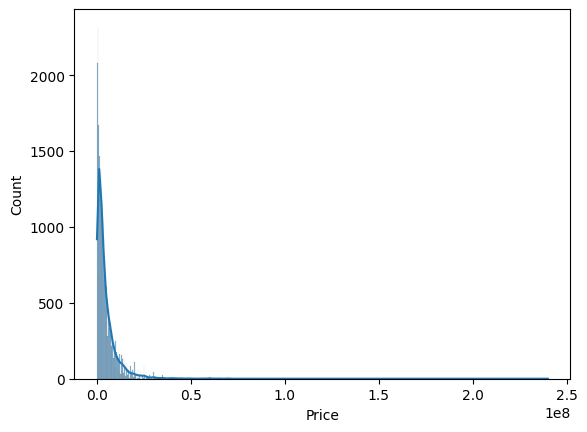

In [149]:
import seaborn as sns
sns.histplot(df['Price'], kde=True)
plt.show()


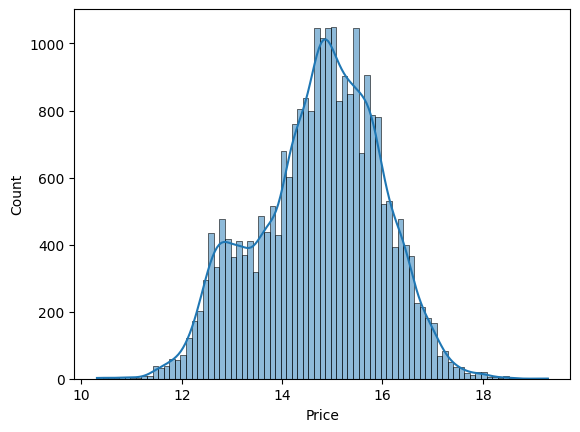

In [150]:


df['Price'] = np.log(df['Price'])
sns.histplot(df['Price'], kde=True)
plt.show()


In [151]:
mean = np.mean(df['Price'])
median = np.median(df['Price'])
df['Price'].replace(np.nan , mean, inplace=True)

In [152]:
q1 = np.percentile(df['Price'], 25)
q3 = np.percentile(df['Price'], 75)
norm_range = (q3 - q1) * 1.5
lower_outliers = df[df['Price'] < (q1 - norm_range)]
upper_outliers = df[df['Price'] > (q3 + norm_range)]
outliers = len(lower_outliers) + len(upper_outliers)
print(f"The number of outliers in Price: {outliers}")

The number of outliers in Price: 71


In [153]:
df['Price'] = np.where(df['Price'] < (q1 - norm_range), q1 - norm_range, df['Price'])
df['Price'] = np.where(df['Price'] > (q3 + norm_range), q3 + norm_range, df['Price'])

In [154]:
#area handling nulls and outliers

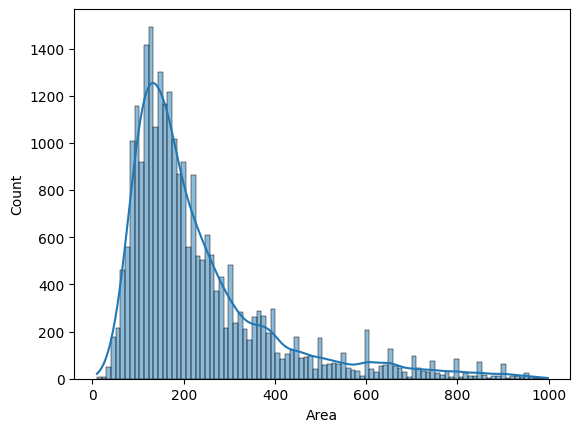

In [155]:
sns.histplot(df['Area'], kde=True)
plt.show()

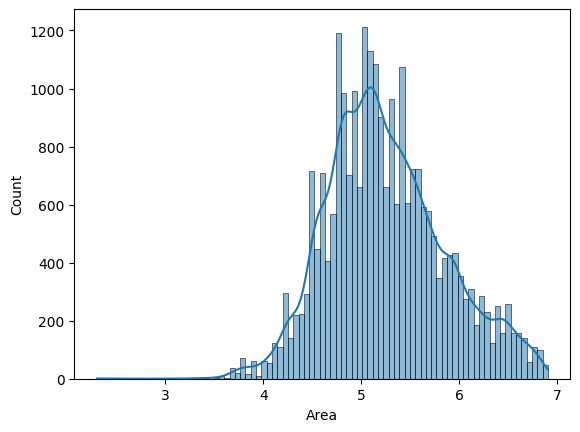

In [156]:
df['Area'] = np.log(df['Area'])
sns.histplot(df['Area'], kde=True)
plt.show()


In [157]:
mean = np.mean(df['Area'])
median = np.median(df['Area'])
df['Area'].replace(np.nan , mean, inplace=True)

In [158]:
q1 = np.percentile(df['Area'], 25)
q3 = np.percentile(df['Area'], 75)
norm_range = (q3 - q1) * 1.5
lower_outliers = df[df['Area'] < (q1 - norm_range)]
upper_outliers = df[df['Area'] > (q3 + norm_range)]
outliers = len(lower_outliers) + len(upper_outliers)
print(f"The number of outliers in Area: {outliers}")

The number of outliers in Area: 172


In [159]:
df['Area'] = np.where(df['Area'] < (q1 - norm_range), q1 - norm_range, df['Area'])
df['Area'] = np.where(df['Area'] > (q3 + norm_range), q3 + norm_range, df['Area'])

In [160]:
df.drop_duplicates(inplace=True)

In [161]:
df.duplicated().sum()

0

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25034 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            25034 non-null  int64  
 1   Price           25034 non-null  float64
 2   Bedrooms        25034 non-null  int64  
 3   Bathrooms       25034 non-null  int64  
 4   Area            25034 non-null  float64
 5   Furnished       25034 non-null  int64  
 6   Level           25034 non-null  float64
 7   Compound        25034 non-null  int64  
 8   Payment_Option  25034 non-null  int64  
 9   Delivery_Date   25034 non-null  int64  
 10  Delivery_Term   25034 non-null  int64  
 11  City            25034 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.5 MB


co relatian

In [163]:

df.corr()


,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
Type,1.000000,0.457649,0.478144,0.535600,0.537846,-0.027897,-0.460536,-0.120798,0.021307,0.001735,0.110850,0.110093
Price,0.457649,1.000000,0.493234,0.598881,0.598651,0.071211,-0.267202,-0.169232,0.191261,-0.062834,0.087256,0.140819
Bedrooms,0.478144,0.493234,1.000000,0.806936,0.734718,-0.016906,-0.249194,-0.036314,0.022707,0.025195,0.139661,0.115643
Bathrooms,0.535600,0.598881,0.806936,1.000000,0.736518,-0.014055,-0.315101,-0.110739,0.073716,-0.017165,0.164008,0.128467
Area,0.537846,0.598651,0.734718,0.736518,1.000000,-0.049540,-0.265771,-0.046588,0.058134,0.020325,0.189257,0.120759
Furnished,-0.027897,0.071211,-0.016906,-0.014055,-0.049540,1.000000,-0.003173,-0.041397,0.045044,0.027662,-0.151937,-0.063636
Level,-0.460536,-0.267202,-0.249194,-0.315101,-0.265771,-0.003173,1.000000,0.150642,0.046442,-0.007131,-0.047446,-0.053890
Compound,-0.120798,-0.169232,-0.036314,-0.110739,-0.046588,-0.041397,0.150642,1.000000,-0.078882,0.038726,0.005078,-0.048626
Payment_Option,0.021307,0.191261,0.022707,0.073716,0.058134,0.045044,0.046442,-0.078882,1.000000,-0.168707,0.055645,0.019574
Delivery_Date,0.001735,-0.062834,0.025195,-0.017165,0.020325,0.027662,-0.007131,0.038726,-0.168707,1.000000,-0.146310,0.031443


In [164]:
high_corr = []
low_corr = []
bad_corr = []
for col in df.columns:
    relation = abs(df['Price'].corr(df[col]))
    if relation >= 0.7 and relation <= 1:
        high_corr.append(col)
    elif relation >= 0.4 and relation < 0.7:
        low_corr.append(col)
    else:
        bad_corr.append(col)

print(f"The high corr are {high_corr}")
print(f"The low corr are {low_corr}")
print(f"The bad corr are {bad_corr}")


The high corr are ['Price']
The low corr are ['Type', 'Bedrooms', 'Bathrooms', 'Area']
The bad corr are ['Furnished', 'Level', 'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City']


In [165]:
#sns.pairplot(df)

regressin models

In [166]:
from sklearn.model_selection import train_test_split

X = df[['Type', 'Bedrooms', 'Bathrooms', 'Area', 'Furnished', 'Level',
       'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [167]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17523, 11)
(17523,)
(7511, 11)
(7511,)


Linear Regression

Linear Regression:
Error: 0.7837730649098137
Accuracy: 0.47683208595674875


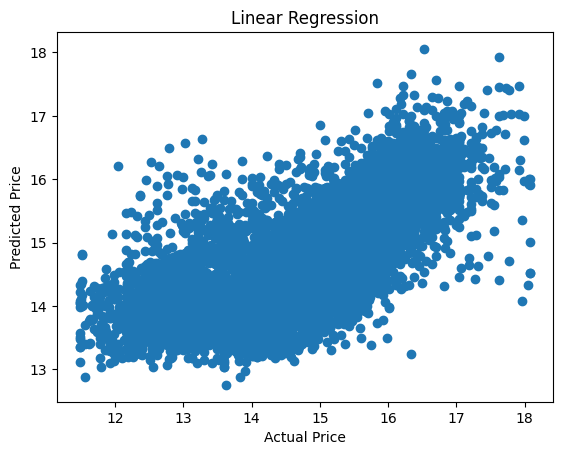

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
error= mean_squared_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)
print(f"Linear Regression:")
print(f"Error: {error}")
print(f"Accuracy: {accuracy}")
linear_acc = accuracy
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression")
plt.show()


Poly regression

Polynomial Regression:
Error: 0.7162314777036249
Accuracy: 0.5219160431273082


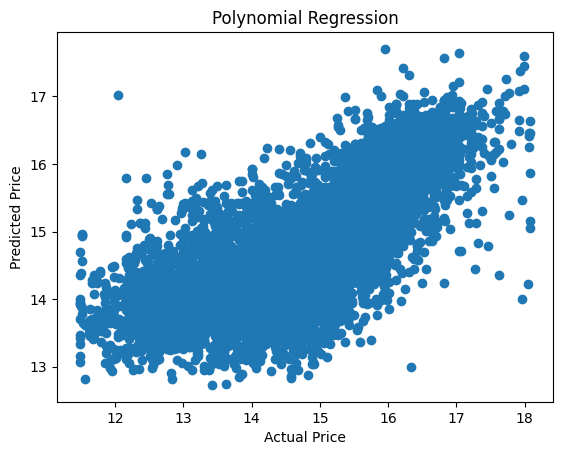

In [169]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
linear_2 = LinearRegression()
linear_2.fit(X_poly, y_train)
y_pred2 = linear_2.predict(poly_reg.fit_transform(X_test))
error = mean_squared_error(y_test, y_pred2)
accuracy = r2_score(y_test, y_pred2)
print(f"Polynomial Regression:")
print(f"Error: {error}")
print(f"Accuracy: {accuracy}")
poly_acc = accuracy
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression")
plt.show()


KNN


KNN Regression:
Error: 0.6728042909090102
Accuracy: 0.5509036566921091


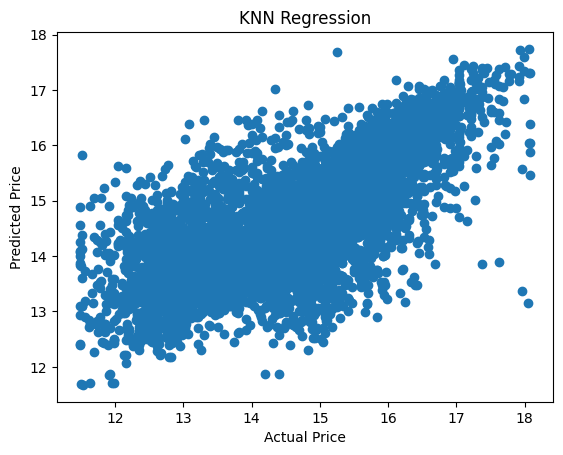

In [170]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
error = mean_squared_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)
print(f"KNN Regression:")
print(f"Error: {error}")
print(f"Accuracy: {accuracy}")
knn_acc = accuracy
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Regression")
plt.show()

Random Forest

Random Forest Regression:
Error: 0.5866565557024973
Accuracy: 0.608407203248315


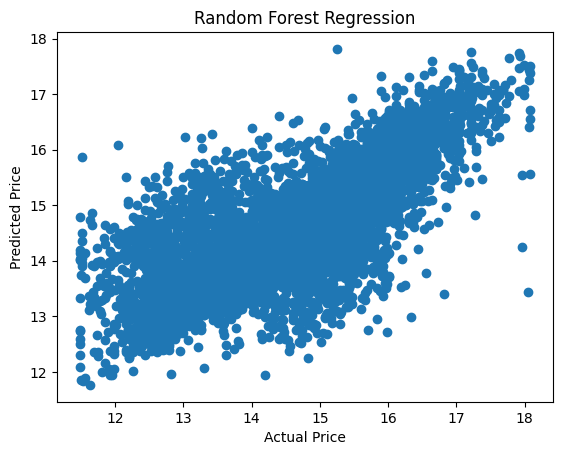

In [171]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
error = mean_squared_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)
print(f"Random Forest Regression:")
print(f"Error: {error}")
print(f"Accuracy: {accuracy}")
forest_acc = accuracy
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest Regression")
plt.show()

In [172]:
print(f"MOdel  : accuercy")
print(f"Linear Regression  : {linear_acc}")
print(f"Poly regression : {poly_acc}")
print(f"KNN : {knn_acc}")
print(f"Random forest : {forest_acc}")

MOdel  : accuercy
Linear Regression  : 0.47683208595674875
Poly regression : 0.5219160431273082
KNN : 0.5509036566921091
Random forest : 0.608407203248315
